# Imports and Reading CSV

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import numpy as np
import pandas as pd
import re

from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn import svm
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE
from sklearn.feature_selection import f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.pipeline import Pipeline

from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_squared_error

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/My Drive/Deep Blue/Data/Wardwise Data/Final.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,Months,Year,Demand,Consumption,Conections,Wards,Total Population,Slum Population,Non-slum Population,Rainfal(in mm)
1,1,2014,37940409.89,2655046.996,9703,T,349587,87596,261991,0
2,2,2014,37811107.44,2647108.576,9739,T,349916,87678,262238,0
3,3,2014,38005061.11,2655046.996,9739,T,350245,87760,262484,0
4,4,2014,38134363.56,2662985.417,9775,T,350574,87843,262731,0


# Column Initialization

In [4]:
cols = ['Month', 'Year','Demand','Consumption','Connections','Ward','Total','Slum', 'NonSlum','Rain']
df.columns = cols
df.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain
0,Months,Year,Demand,Consumption,Conections,Wards,Total Population,Slum Population,Non-slum Population,Rainfal(in mm)
1,1,2014,37940409.89,2655046.996,9703,T,349587,87596,261991,0
2,2,2014,37811107.44,2647108.576,9739,T,349916,87678,262238,0
3,3,2014,38005061.11,2655046.996,9739,T,350245,87760,262484,0
4,4,2014,38134363.56,2662985.417,9775,T,350574,87843,262731,0


# Null Values are dropped

In [0]:
df = df.dropna()
df = df.iloc[1:,:]

In [6]:
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
Month          1440 non-null object
Year           1440 non-null object
Demand         1440 non-null object
Consumption    1440 non-null object
Connections    1440 non-null object
Ward           1440 non-null object
Total          1440 non-null object
Slum           1440 non-null object
NonSlum        1440 non-null object
Rain           1440 non-null object
dtypes: object(10)
memory usage: 112.6+ KB


In [7]:
df.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain
0,1,2014,37940409.89,2655046.996,9703,T,349587,87596,261991,0
1,2,2014,37811107.44,2647108.576,9739,T,349916,87678,262238,0
2,3,2014,38005061.11,2655046.996,9739,T,350245,87760,262484,0
3,4,2014,38134363.56,2662985.417,9775,T,350574,87843,262731,0
4,5,2014,38392968.45,2678862.257,9775,T,350903,87925,262977,0


# Convert to numeric

In [8]:
for obj in cols:
  if obj == 'Ward':
    pass
  else:
    df[obj] = pd.to_numeric(df[obj])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
Month          1440 non-null int64
Year           1440 non-null int64
Demand         1440 non-null float64
Consumption    1440 non-null float64
Connections    1440 non-null int64
Ward           1440 non-null object
Total          1440 non-null int64
Slum           1440 non-null int64
NonSlum        1440 non-null int64
Rain           1440 non-null float64
dtypes: float64(3), int64(6), object(1)
memory usage: 112.6+ KB


# Initial Heatmap

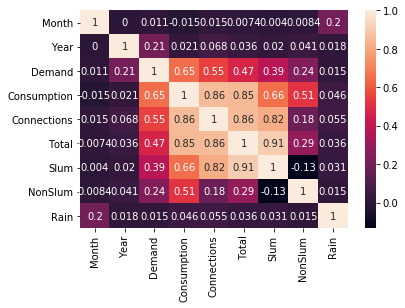

In [9]:
sns.heatmap(df.corr(),annot = True)

# Label Encode categorical data to numeric values

In [10]:
wardDf = df.copy()
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
wardDf.Ward = le.fit_transform(df.Ward)
wardDf.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain
0,1,2014,37940409.89,2655046.996,9703,23,349587,87596,261991,0.0
1,2,2014,37811107.44,2647108.576,9739,23,349916,87678,262238,0.0
2,3,2014,38005061.11,2655046.996,9739,23,350245,87760,262484,0.0
3,4,2014,38134363.56,2662985.417,9775,23,350574,87843,262731,0.0
4,5,2014,38392968.45,2678862.257,9775,23,350903,87925,262977,0.0


# Dependents and Independents

In [0]:
X = wardDf[['Month', 'Year','Connections','Ward','Total','Slum', 'NonSlum','Rain']]
Y = wardDf[['Consumption']]

# Initial Iteration

In [0]:
df = wardDf.copy()

In [0]:
X = df[['Month', 'Year','Connections','Ward','Total','Slum', 'NonSlum','Rain']]
Y = df[['Consumption']]

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as snf
X_const = sm.add_constant(X)
model = sm.OLS(Y, X_const)
lr = model.fit()
lr.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1623.
Date:                Sat, 15 Feb 2020   Prob (F-statistic):               0.00
Time:                        03:21:38   Log-Likelihood:                -20514.
No. Observations:                1440   AIC:                         4.105e+04
Df Residuals:                    1431   BIC:                         4.109e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.051e+07   1.47e+07      4.803      0.000    4.17e+07    9.93e+07
Month       -9967.9190   2911.020     -3.424      0.001   -1.57e+04   -4257.595
Year        -3.506e+04   7281.252     -4.815      0.000   -4.93e+04   -2.08e+04
Connections    74.8803      2.365     31.660      0.000      70.241      79.520
Ward         1.535e+04   1789.054      8.582      0.000    1.18e+04    1.89e+04
Total        -254.8551    235.536     -1.082      0.279    -716.888     207.177
Slum          256.0043    235.531      1.087      0.277    -206.019     718.028
NonSlum       259.8519    235.538      1.103      0.270    -202.185     721.889
Rain           20.6647     37.708      0.548      0.584     -53.304      94.634
==============================================================================
Omnibus:                      189.865   Durbin-Watson:                   0.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.840
Skew:                           0.948   Prob(JB):                     2.82e-61
Kurtosis:                       4.025   Cond. No.                     1.09e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Resolving Multicolinearity

In [15]:
# Imports
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.head(8)

,VIF Factor,features
0,4.741741e+00,Month
1,1.437623e+01,Year
2,1.612534e+01,Connections
3,5.919329e+00,Ward
4,1.878447e+08,Total
5,7.162651e+07,Slum
6,4.080498e+07,NonSlum
7,1.546362e+00,Rain


# Second Iteration

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.intercept_)
print(reg.coef_)

[74384873.60456106]
[[-8.77352548e+03 -3.69790859e+04  7.52167922e+01  1.31222899e+04
  -2.64927429e+02  2.66114604e+02  2.69952327e+02 -2.19692854e+01]]


In [17]:
linear_reg = snf.ols(formula = 'Y ~ Connections + Year + Month + Ward + Slum + Rain', data = wardDf)
benchmark = linear_reg.fit()
r2_score(Y,benchmark.predict(df))

0.7751017826971247

In [18]:
Y_pred = reg.predict(X_test)
df1 = pd.DataFrame({'Actual': Y_test.values.flatten(), 'Predicted': Y_pred.flatten()})
df2 = df1.head()
print(df2)

        Actual     Predicted
0  2368417.393  2.296041e+06
1  1848714.818  1.303106e+06
2  2062023.391  1.990005e+06
3  2716659.336  2.517670e+06
4  3662415.683  3.607259e+06


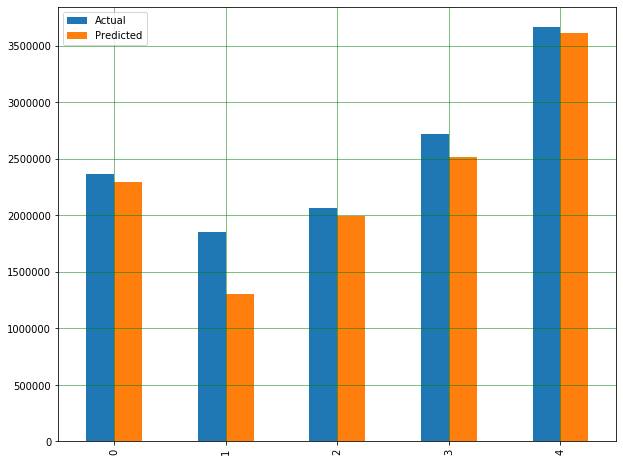

In [19]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

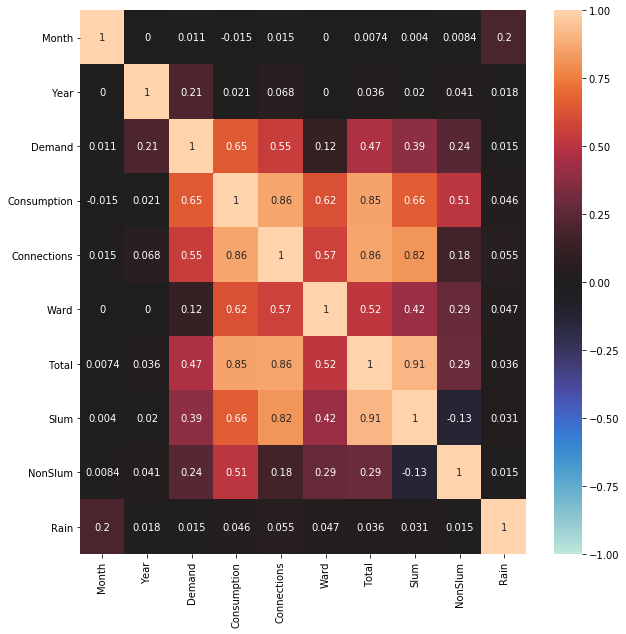

In [20]:
plt.figure(figsize = (10,10))
sns.heatmap( df.corr(), annot = True, vmin=-1, vmax=1, center= 0)
plt.show()

In [21]:
sns.pairplot(df[cols], height=4)
plt.show()

KeyboardInterrupt: ignored

#Conversion of Cyclic variables


In [22]:
wardDf['mnth_sin'] = np.sin((df.Month-1)*(2.*np.pi/12))
wardDf['mnth_cos'] = np.cos((df.Month-1)*(2.*np.pi/12))
df['mnth_sin'] = np.sin((df.Month-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.Month-1)*(2.*np.pi/12))
df.isnull().sum()

Month          0
Year           0
Demand         0
Consumption    0
Connections    0
Ward           0
Total          0
Slum           0
NonSlum        0
Rain           0
mnth_sin       0
mnth_cos       0
dtype: int64

# Third Iteration

In [23]:
linear_reg = snf.ols(formula = 'Y ~ Connections + Year + mnth_sin + mnth_cos + Total + Ward + NonSlum + Rain', data = wardDf)
benchmark = linear_reg.fit()
r2_score(Y,benchmark.predict(df))

0.9005713318603145

# Scaling the variables MinMax / Robust

In [24]:
df.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
0,1,2014,37940409.89,2655046.996,9703,23,349587,87596,261991,0.0,0.000000,1.000000e+00
1,2,2014,37811107.44,2647108.576,9739,23,349916,87678,262238,0.0,0.500000,8.660254e-01
2,3,2014,38005061.11,2655046.996,9739,23,350245,87760,262484,0.0,0.866025,5.000000e-01
3,4,2014,38134363.56,2662985.417,9775,23,350574,87843,262731,0.0,1.000000,6.123234e-17
4,5,2014,38392968.45,2678862.257,9775,23,350903,87925,262977,0.0,0.866025,-5.000000e-01


In [0]:
testData = df.copy()

In [26]:
from sklearn import preprocessing 
scale=df[['Total']].values;

  
popscaler = preprocessing.MinMaxScaler(feature_range =(0,1))
populationScaler = popscaler.fit_transform(scale) 
i=0
for row in populationScaler :
    for elem in row:
        testData.at[i,'Total']=elem
    i+=1 
testData.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
0,1,2014,37940409.89,2655046.996,9703,23,0,87596,261991,0.0,0.000000,1.000000e+00
1,2,2014,37811107.44,2647108.576,9739,23,0,87678,262238,0.0,0.500000,8.660254e-01
2,3,2014,38005061.11,2655046.996,9739,23,0,87760,262484,0.0,0.866025,5.000000e-01
3,4,2014,38134363.56,2662985.417,9775,23,0,87843,262731,0.0,1.000000,6.123234e-17
4,5,2014,38392968.45,2678862.257,9775,23,0,87925,262977,0.0,0.866025,-5.000000e-01


In [27]:

robustConnections = RobustScaler(quantile_range = (25,75))
scale = df[['Connections']]
connectionScaled = robustConnections.fit_transform(scale.values.reshape(-1, 1))
i = 0
for row in connectionScaled:
  for elem in row:
    testData.at[i,'Connections'] = elem
  i+=1
testData.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
0,1,2014,37940409.89,2655046.996,0,23,0,87596,261991,0.0,0.000000,1.000000e+00
1,2,2014,37811107.44,2647108.576,0,23,0,87678,262238,0.0,0.500000,8.660254e-01
2,3,2014,38005061.11,2655046.996,0,23,0,87760,262484,0.0,0.866025,5.000000e-01
3,4,2014,38134363.56,2662985.417,0,23,0,87843,262731,0.0,1.000000,6.123234e-17
4,5,2014,38392968.45,2678862.257,0,23,0,87925,262977,0.0,0.866025,-5.000000e-01


In [28]:
robustYear = RobustScaler(quantile_range = (25,75))
scale = df[['Year']]
yearScaled = robustYear.fit_transform(scale.values.reshape(-1, 1))
i = 0
for row in yearScaled:
  for elem in row:
    testData.at[i,'Year'] = elem
  i+=1
testData.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
0,1,-1,37940409.89,2655046.996,0,23,0,87596,261991,0.0,0.000000,1.000000e+00
1,2,-1,37811107.44,2647108.576,0,23,0,87678,262238,0.0,0.500000,8.660254e-01
2,3,-1,38005061.11,2655046.996,0,23,0,87760,262484,0.0,0.866025,5.000000e-01
3,4,-1,38134363.56,2662985.417,0,23,0,87843,262731,0.0,1.000000,6.123234e-17
4,5,-1,38392968.45,2678862.257,0,23,0,87925,262977,0.0,0.866025,-5.000000e-01


In [29]:
testData.tail()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
1435,8,1,81230016.25,1806696.898,0,0,0,24020,175428,426.875,-0.500000,-8.660254e-01
1436,9,1,80748653.52,1794819.278,0,0,0,24043,175592,426.875,-0.866025,-5.000000e-01
1437,10,1,80267290.79,1782941.657,0,0,0,24065,175756,0.000,-1.000000,-1.836970e-16
1438,11,1,80026609.42,1777002.847,0,0,0,24088,175920,0.000,-0.866025,5.000000e-01
1439,12,1,78702861.91,1771064.037,0,0,0,24110,176084,0.000,-0.500000,8.660254e-01


In [30]:
robustRain = RobustScaler(quantile_range = (25,75))
scale = df[['Rain']]
rainScaled = robustRain.fit_transform(scale.values.reshape(-1, 1))
i = 0
for row in rainScaled:
  for elem in row:
    testData.at[i,'Rain'] = elem
  i+=1
testData.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
0,1,-1,37940409.89,2655046.996,0,23,0,87596,261991,0.0,0.000000,1.000000e+00
1,2,-1,37811107.44,2647108.576,0,23,0,87678,262238,0.0,0.500000,8.660254e-01
2,3,-1,38005061.11,2655046.996,0,23,0,87760,262484,0.0,0.866025,5.000000e-01
3,4,-1,38134363.56,2662985.417,0,23,0,87843,262731,0.0,1.000000,6.123234e-17
4,5,-1,38392968.45,2678862.257,0,23,0,87925,262977,0.0,0.866025,-5.000000e-01


In [0]:
y_minmax = testData[['Consumption']]

In [32]:
testData.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
0,1,-1,37940409.89,2655046.996,0,23,0,87596,261991,0.0,0.000000,1.000000e+00
1,2,-1,37811107.44,2647108.576,0,23,0,87678,262238,0.0,0.500000,8.660254e-01
2,3,-1,38005061.11,2655046.996,0,23,0,87760,262484,0.0,0.866025,5.000000e-01
3,4,-1,38134363.56,2662985.417,0,23,0,87843,262731,0.0,1.000000,6.123234e-17
4,5,-1,38392968.45,2678862.257,0,23,0,87925,262977,0.0,0.866025,-5.000000e-01


# Fourth Iteration

In [33]:
linear_reg = snf.ols(formula = 'Y ~ Connections + mnth_sin + mnth_cos + Total + Ward + Rain', data = testData)
benchmark = linear_reg.fit()
r2_score(y_minmax,benchmark.predict(df))

-211612710.78479847

# Robust Test

In [34]:
robustTest = df.copy()
robustRain = RobustScaler(quantile_range = (25,75))
scale = df[['Rain']]
rainScaled = robustRain.fit_transform(scale.values.reshape(-1, 1))
i = 0
for row in rainScaled:
  for elem in row:
    robustTest.at[i,'Rain'] = elem
  i+=1
robustTest.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
0,1,2014,37940409.89,2655046.996,9703,23,349587,87596,261991,0.0,0.000000,1.000000e+00
1,2,2014,37811107.44,2647108.576,9739,23,349916,87678,262238,0.0,0.500000,8.660254e-01
2,3,2014,38005061.11,2655046.996,9739,23,350245,87760,262484,0.0,0.866025,5.000000e-01
3,4,2014,38134363.56,2662985.417,9775,23,350574,87843,262731,0.0,1.000000,6.123234e-17
4,5,2014,38392968.45,2678862.257,9775,23,350903,87925,262977,0.0,0.866025,-5.000000e-01


In [35]:
robustTest[['Connections']] = robustTest[['Connections']].astype(float)
robustTest[['Total']] = robustTest[['Total']].astype(float)
robustTest[['Slum']] = robustTest[['Slum']].astype(float)
robustTest[['NonSlum']] = robustTest[['NonSlum']].astype(float)

robustTest.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
0,1,2014,37940409.89,2655046.996,9703.0,23,349587.0,87596.0,261991.0,0.0,0.000000,1.000000e+00
1,2,2014,37811107.44,2647108.576,9739.0,23,349916.0,87678.0,262238.0,0.0,0.500000,8.660254e-01
2,3,2014,38005061.11,2655046.996,9739.0,23,350245.0,87760.0,262484.0,0.0,0.866025,5.000000e-01
3,4,2014,38134363.56,2662985.417,9775.0,23,350574.0,87843.0,262731.0,0.0,1.000000,6.123234e-17
4,5,2014,38392968.45,2678862.257,9775.0,23,350903.0,87925.0,262977.0,0.0,0.866025,-5.000000e-01


In [36]:
robustConn = RobustScaler(quantile_range = (25,75))
scale = df[['Connections']]
connScaled = robustConn.fit_transform(scale.values.reshape(-1, 1))
i = 0
for row in connScaled:
  for elem in row:
    robustTest.at[i,'Connections'] = elem
  i+=1
robustTest.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
0,1,2014,37940409.89,2655046.996,-0.240108,23,349587.0,87596.0,261991.0,0.0,0.000000,1.000000e+00
1,2,2014,37811107.44,2647108.576,-0.237788,23,349916.0,87678.0,262238.0,0.0,0.500000,8.660254e-01
2,3,2014,38005061.11,2655046.996,-0.237788,23,350245.0,87760.0,262484.0,0.0,0.866025,5.000000e-01
3,4,2014,38134363.56,2662985.417,-0.235468,23,350574.0,87843.0,262731.0,0.0,1.000000,6.123234e-17
4,5,2014,38392968.45,2678862.257,-0.235468,23,350903.0,87925.0,262977.0,0.0,0.866025,-5.000000e-01


In [37]:
robustPop = RobustScaler(quantile_range = (25,75))
scale = df[['Total']]
popScaled = robustPop.fit_transform(scale.values.reshape(-1, 1))
i = 0
for row in popScaled:
  for elem in row:
    robustTest.at[i,'Total'] = elem
  i+=1
robustTest.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
0,1,2014,37940409.89,2655046.996,-0.240108,23,-0.453990,87596.0,261991.0,0.0,0.000000,1.000000e+00
1,2,2014,37811107.44,2647108.576,-0.237788,23,-0.453122,87678.0,262238.0,0.0,0.500000,8.660254e-01
2,3,2014,38005061.11,2655046.996,-0.237788,23,-0.452253,87760.0,262484.0,0.0,0.866025,5.000000e-01
3,4,2014,38134363.56,2662985.417,-0.235468,23,-0.451385,87843.0,262731.0,0.0,1.000000,6.123234e-17
4,5,2014,38392968.45,2678862.257,-0.235468,23,-0.450517,87925.0,262977.0,0.0,0.866025,-5.000000e-01


In [0]:
yrob = robustTest[['Consumption']]

# Fifth Iteration

In [39]:
linear_reg = snf.ols(formula = 'Y ~ Connections + mnth_sin + mnth_cos + Total + Ward + Rain', data = robustTest)
benchmark = linear_reg.fit()
r2_score(yrob,benchmark.predict(df))

-151299345379.93793

# One Hot Encoding

In [0]:
df = robustTest.copy()

In [41]:
ohe = OneHotEncoder(categories = 'auto', sparse = False)
Ward = np.array(df.Ward).reshape(-1,1)
Ward = ohe.fit_transform(Ward)
df1 = pd.DataFrame(Ward)
mainTest = pd.concat([df, df1], axis=1, ignore_index=True)
mainTest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,1,2014,37940409.89,2655046.996,-0.240108,23,-0.453990,87596.0,261991.0,0.0,0.000000,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2014,37811107.44,2647108.576,-0.237788,23,-0.453122,87678.0,262238.0,0.0,0.500000,8.660254e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,2014,38005061.11,2655046.996,-0.237788,23,-0.452253,87760.0,262484.0,0.0,0.866025,5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,2014,38134363.56,2662985.417,-0.235468,23,-0.451385,87843.0,262731.0,0.0,1.000000,6.123234e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,2014,38392968.45,2678862.257,-0.235468,23,-0.450517,87925.0,262977.0,0.0,0.866025,-5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [42]:
cols = ['Month', 'Year','Demand','Consumption','Connections','Ward','Total','Slum', 'NonSlum','Rain', 'mnth_sin', 'mnth_cos']
newCols = []
mainTest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,1,2014,37940409.89,2655046.996,-0.240108,23,-0.453990,87596.0,261991.0,0.0,0.000000,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2014,37811107.44,2647108.576,-0.237788,23,-0.453122,87678.0,262238.0,0.0,0.500000,8.660254e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,2014,38005061.11,2655046.996,-0.237788,23,-0.452253,87760.0,262484.0,0.0,0.866025,5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,2014,38134363.56,2662985.417,-0.235468,23,-0.451385,87843.0,262731.0,0.0,1.000000,6.123234e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,2014,38392968.45,2678862.257,-0.235468,23,-0.450517,87925.0,262977.0,0.0,0.866025,-5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [43]:
for i in range(1,25):
  col_name = 'cat' + str(i)
  cols.append(col_name)
  newCols.append(col_name)

mainTest.columns = cols
mainTest.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24
0,1,2014,37940409.89,2655046.996,-0.240108,23,-0.453990,87596.0,261991.0,0.0,0.000000,1.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,2014,37811107.44,2647108.576,-0.237788,23,-0.453122,87678.0,262238.0,0.0,0.500000,8.660254e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,2014,38005061.11,2655046.996,-0.237788,23,-0.452253,87760.0,262484.0,0.0,0.866025,5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,2014,38134363.56,2662985.417,-0.235468,23,-0.451385,87843.0,262731.0,0.0,1.000000,6.123234e-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,2014,38392968.45,2678862.257,-0.235468,23,-0.450517,87925.0,262977.0,0.0,0.866025,-5.000000e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
cols = ['Month', 'Year','Demand','Consumption','Connections','Ward','Total','Slum', 'NonSlum', 'mnth_sin', 'mnth_cos']

totalCols = list(df.columns)
XCols = cols

XCols.remove('Ward')
XCols.remove('Month')
XCols.remove('Slum')
XCols.remove('NonSlum')
XCols.remove('Demand')
XCols.remove('Consumption')
X = mainTest[XCols]
Y = mainTest[['Consumption']]

print(cols)
print(totalCols)
print(XCols)

['Year', 'Connections', 'Total', 'mnth_sin', 'mnth_cos']
['Month', 'Year', 'Demand', 'Consumption', 'Connections', 'Ward', 'Total', 'Slum', 'NonSlum', 'Rain', 'mnth_sin', 'mnth_cos']
['Year', 'Connections', 'Total', 'mnth_sin', 'mnth_cos']


In [0]:
y_test = df[['Demand']]

In [46]:
pcaCols = mainTest[newCols]
pcaCols.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [47]:
# Imports
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.head(10)

,VIF Factor,features
0,1.010881,Year
1,3.924751,Connections
2,3.925113,Total
3,1.000142,mnth_sin
4,1.000217,mnth_cos


# Sixth Iteration

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.intercept_)
print(reg.coef_)

[51471294.87087023]
[[ -24275.83567153 1046406.19035182  798740.83346479   43104.12062952
     2550.06133351]]


In [49]:
r2_score(Y_test, reg.predict(X_test))

0.7666524000261542

# PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(pcaCols)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PCA0','PCA1','PCA2'])

In [0]:
finalDf = pd.concat([principalDf, X, Y], axis = 1)

In [0]:
finalTest = pd.concat([principalDf, X, y_test],axis = 1)

In [53]:
finalDf.head()

,PCA0,PCA1,PCA2,Year,Connections,Total,mnth_sin,mnth_cos,Consumption
0,0.467046,0.131772,-0.072058,2014,-0.240108,-0.453990,0.000000,1.000000e+00,2655046.996
1,0.467046,0.131772,-0.072058,2014,-0.237788,-0.453122,0.500000,8.660254e-01,2647108.576
2,0.467046,0.131772,-0.072058,2014,-0.237788,-0.452253,0.866025,5.000000e-01,2655046.996
3,0.467046,0.131772,-0.072058,2014,-0.235468,-0.451385,1.000000,6.123234e-17,2662985.417
4,0.467046,0.131772,-0.072058,2014,-0.235468,-0.450517,0.866025,-5.000000e-01,2678862.257


In [0]:
X = finalDf[['PCA0', 'PCA1', 'PCA2', 'Connections','Year','Total','mnth_sin','mnth_cos']]
Y = finalDf[['Consumption']]

# Seventh Iteration

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train, Y_train)
print(reg.intercept_)
print(reg.coef_)

[46260564.78028999]
[[-215065.5742874  -252525.32261074 -249734.09528694  902864.66582332
   -21691.89589318  921865.10376554   41298.73097497    1517.83634534]]


In [56]:
r2_score(Y_test, reg.predict(X_test))

0.7625365686619998

In [57]:
# Imports
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.head(10)

,VIF Factor,features
0,1.162362,PCA0
1,1.490337,PCA1
2,1.145827,PCA2
3,5.578928,Connections
4,1.013691,Year
5,6.422117,Total
6,1.000170,mnth_sin
7,1.000297,mnth_cos


In [58]:
finalDf.tail()

,PCA0,PCA1,PCA2,Year,Connections,Total,mnth_sin,mnth_cos,Consumption
1435,0.342397,-0.221038,0.01029,2018,-0.559093,-0.850299,-0.500000,-8.660254e-01,1806696.898
1436,0.342397,-0.221038,0.01029,2018,-0.561799,-0.849805,-0.866025,-5.000000e-01,1794819.278
1437,0.342397,-0.221038,0.01029,2018,-0.565408,-0.849314,-1.000000,-1.836970e-16,1782941.657
1438,0.342397,-0.221038,0.01029,2018,-0.567212,-0.848823,-0.866025,5.000000e-01,1777002.847
1439,0.342397,-0.221038,0.01029,2018,-0.567857,-0.848329,-0.500000,8.660254e-01,1771064.037


# Feature Importance and Selection

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [60]:
test = SelectKBest(score_func=sk.feature_selection.f_regression, k=3)
fit = test.fit(X, Y)
# summarize scores
np.set_printoptions(precision=3)

print(sorted(zip(map(lambda x: round(x, 4), fit.scores_), finalDf.columns), reverse=True))

[(4175.5908, 'Year'), (3796.6519, 'Total'), (195.9684, 'PCA0'), (39.9266, 'PCA1'), (0.6087, 'Connections'), (0.4736, 'PCA2'), (0.4216, 'mnth_sin'), (0.1423, 'mnth_cos')]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
names = finalDf.columns
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Features sorted by their score:
[(0.6733, 'Total'), (0.1998, 'Year'), (0.0639, 'PCA0'), (0.033, 'PCA1'), (0.025, 'PCA2'), (0.0044, 'Connections'), (0.0004, 'mnth_sin'), (0.0002, 'mnth_cos')]


In [62]:
from pandas.plotting import scatter_matrix
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.externals import joblib

from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


# Training and comparing accuracy, Eighth Iteration

In [0]:
pipeline_list = []
models = []
models.append( ('Lasso', Lasso()) )
models.append( ('KNN', KNeighborsRegressor()) )
models.append( ('CART', DecisionTreeRegressor()) )
models.append( ('SVR', SVR()) )

In [64]:
for name, model in models:
    pipelined_model = Pipeline([(name, model)])
    
    # Train model
    pipelined_model.fit(X_train, Y_train)
    
    # Make predictions on the test-set
    y_hat = pipelined_model.predict(X_test)
    
    
    # Calculate error
    RMSE = np.sqrt(mean_squared_error(Y_test, y_hat))
    print('Model: ', name)
    print(r2_score(Y_test,y_hat))
    print('----------------')
    
    # I also like to save the models each time as a matter of habit
    joblib.dump(pipelined_model, '{}_model.pkl'.format(name))

Model:  Lasso
0.768161820251006
----------------
Model:  KNN
0.7519024813205715
----------------
Model:  CART
0.998338480489766
----------------
Model:  SVR
-0.007820993206001159
----------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [65]:
finalDf.head()

,PCA0,PCA1,PCA2,Year,Connections,Total,mnth_sin,mnth_cos,Consumption
0,0.467046,0.131772,-0.072058,2014,-0.240108,-0.453990,0.000000,1.000000e+00,2655046.996
1,0.467046,0.131772,-0.072058,2014,-0.237788,-0.453122,0.500000,8.660254e-01,2647108.576
2,0.467046,0.131772,-0.072058,2014,-0.237788,-0.452253,0.866025,5.000000e-01,2655046.996
3,0.467046,0.131772,-0.072058,2014,-0.235468,-0.451385,1.000000,6.123234e-17,2662985.417
4,0.467046,0.131772,-0.072058,2014,-0.235468,-0.450517,0.866025,-5.000000e-01,2678862.257


# Prediction Generation

In [0]:
predictDf = pd.read_csv('/content/drive/My Drive/Deep Blue/Data/Wardwise Data/Vals.csv')

In [67]:
predictDf.head()

,Month,Year,Ward,Population,Connection,mnth_sin,mnth_cos,Rain
0,1,2029,T,410207,10918,0.000,1.000000e+00,28.00058
1,2,2029,T,410544,10935,0.500,8.660000e-01,28.00058
2,3,2029,T,410881,10952,0.866,5.000000e-01,28.00058
3,4,2029,T,411218,10969,1.000,6.120000e-17,28.00058
4,5,2029,T,411554,10986,0.866,-5.000000e-01,28.00058


In [68]:
newcols = ['Month','Year','Ward','Population','Connection','mnth_sin','mnth_cos','Rain']
predictDf.columns = newcols
predictDf.head()

,Month,Year,Ward,Population,Connection,mnth_sin,mnth_cos,Rain
0,1,2029,T,410207,10918,0.000,1.000000e+00,28.00058
1,2,2029,T,410544,10935,0.500,8.660000e-01,28.00058
2,3,2029,T,410881,10952,0.866,5.000000e-01,28.00058
3,4,2029,T,411218,10969,1.000,6.120000e-17,28.00058
4,5,2029,T,411554,10986,0.866,-5.000000e-01,28.00058


In [69]:
for obj in newcols:
  if obj == 'Ward':
    pass
  else:
    predictDf[obj] = pd.to_numeric(predictDf[obj])
predictDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
Month         12 non-null int64
Year          12 non-null int64
Ward          12 non-null object
Population    12 non-null int64
Connection    12 non-null int64
mnth_sin      12 non-null float64
mnth_cos      12 non-null float64
Rain          12 non-null float64
dtypes: float64(3), int64(4), object(1)
memory usage: 896.0+ bytes


In [70]:
predictDf[['Connection']] = predictDf[['Connection']].astype(float)
predictDf[['Population']] = predictDf[['Population']].astype(float)

predictDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 8 columns):
Month         12 non-null int64
Year          12 non-null int64
Ward          12 non-null object
Population    12 non-null float64
Connection    12 non-null float64
mnth_sin      12 non-null float64
mnth_cos      12 non-null float64
Rain          12 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 896.0+ bytes


In [71]:
mainPred = predictDf.copy()
mainPred = pd.concat([predictDf, finalDf.iloc[0:11,0:3]], axis=1, ignore_index=True)
mainPred.head(12)

,0,1,2,3,4,5,6,7,8,9,10
0,1,2029,T,410207.0,10918.0,0.000000e+00,1.000000e+00,28.00058,0.467046,0.131772,-0.072058
1,2,2029,T,410544.0,10935.0,5.000000e-01,8.660000e-01,28.00058,0.467046,0.131772,-0.072058
2,3,2029,T,410881.0,10952.0,8.660000e-01,5.000000e-01,28.00058,0.467046,0.131772,-0.072058
3,4,2029,T,411218.0,10969.0,1.000000e+00,6.120000e-17,28.00058,0.467046,0.131772,-0.072058
4,5,2029,T,411554.0,10986.0,8.660000e-01,-5.000000e-01,28.00058,0.467046,0.131772,-0.072058
5,6,2029,T,411891.0,11004.0,5.000000e-01,-8.660000e-01,28.00058,0.467046,0.131772,-0.072058
6,7,2029,T,412228.0,11021.0,1.220000e-16,-1.000000e+00,28.00058,0.467046,0.131772,-0.072058
7,8,2029,T,412565.0,11038.0,-5.000000e-01,-8.660000e-01,28.00058,0.467046,0.131772,-0.072058
8,9,2029,T,412901.0,11055.0,-1.000000e+00,-1.840000e-16,28.00058,0.467046,0.131772,-0.072058
9,10,2029,T,413238.0,11072.0,-8.660000e-01,5.000000e-01,28.00058,0.467046,0.131772,-0.072058


In [72]:
mainPred.iloc[11,8:11] = mainPred.iloc[10,8:11].copy()
mainPred.head(12)

,0,1,2,3,4,5,6,7,8,9,10
0,1,2029,T,410207.0,10918.0,0.000000e+00,1.000000e+00,28.00058,0.467046,0.131772,-0.072058
1,2,2029,T,410544.0,10935.0,5.000000e-01,8.660000e-01,28.00058,0.467046,0.131772,-0.072058
2,3,2029,T,410881.0,10952.0,8.660000e-01,5.000000e-01,28.00058,0.467046,0.131772,-0.072058
3,4,2029,T,411218.0,10969.0,1.000000e+00,6.120000e-17,28.00058,0.467046,0.131772,-0.072058
4,5,2029,T,411554.0,10986.0,8.660000e-01,-5.000000e-01,28.00058,0.467046,0.131772,-0.072058
5,6,2029,T,411891.0,11004.0,5.000000e-01,-8.660000e-01,28.00058,0.467046,0.131772,-0.072058
6,7,2029,T,412228.0,11021.0,1.220000e-16,-1.000000e+00,28.00058,0.467046,0.131772,-0.072058
7,8,2029,T,412565.0,11038.0,-5.000000e-01,-8.660000e-01,28.00058,0.467046,0.131772,-0.072058
8,9,2029,T,412901.0,11055.0,-1.000000e+00,-1.840000e-16,28.00058,0.467046,0.131772,-0.072058
9,10,2029,T,413238.0,11072.0,-8.660000e-01,5.000000e-01,28.00058,0.467046,0.131772,-0.072058


In [0]:
newcols = ['Month','Year','Ward','Total','Connections','mnth_sin','mnth_cos','Rain','PCA0','PCA1','PCA2']

In [74]:
mainPred.columns = newcols
mainPred.head(12)

,Month,Year,Ward,Total,Connections,mnth_sin,mnth_cos,Rain,PCA0,PCA1,PCA2
0,1,2029,T,410207.0,10918.0,0.000000e+00,1.000000e+00,28.00058,0.467046,0.131772,-0.072058
1,2,2029,T,410544.0,10935.0,5.000000e-01,8.660000e-01,28.00058,0.467046,0.131772,-0.072058
2,3,2029,T,410881.0,10952.0,8.660000e-01,5.000000e-01,28.00058,0.467046,0.131772,-0.072058
3,4,2029,T,411218.0,10969.0,1.000000e+00,6.120000e-17,28.00058,0.467046,0.131772,-0.072058
4,5,2029,T,411554.0,10986.0,8.660000e-01,-5.000000e-01,28.00058,0.467046,0.131772,-0.072058
5,6,2029,T,411891.0,11004.0,5.000000e-01,-8.660000e-01,28.00058,0.467046,0.131772,-0.072058
6,7,2029,T,412228.0,11021.0,1.220000e-16,-1.000000e+00,28.00058,0.467046,0.131772,-0.072058
7,8,2029,T,412565.0,11038.0,-5.000000e-01,-8.660000e-01,28.00058,0.467046,0.131772,-0.072058
8,9,2029,T,412901.0,11055.0,-1.000000e+00,-1.840000e-16,28.00058,0.467046,0.131772,-0.072058
9,10,2029,T,413238.0,11072.0,-8.660000e-01,5.000000e-01,28.00058,0.467046,0.131772,-0.072058


In [75]:
wardDf.head()

,Month,Year,Demand,Consumption,Connections,Ward,Total,Slum,NonSlum,Rain,mnth_sin,mnth_cos
0,1,2014,37940409.89,2655046.996,9703,23,349587,87596,261991,0.0,0.000000,1.000000e+00
1,2,2014,37811107.44,2647108.576,9739,23,349916,87678,262238,0.0,0.500000,8.660254e-01
2,3,2014,38005061.11,2655046.996,9739,23,350245,87760,262484,0.0,0.866025,5.000000e-01
3,4,2014,38134363.56,2662985.417,9775,23,350574,87843,262731,0.0,1.000000,6.123234e-17
4,5,2014,38392968.45,2678862.257,9775,23,350903,87925,262977,0.0,0.866025,-5.000000e-01


In [76]:
scaledPred = pd.concat([wardDf[['Total','Connections','Rain']],mainPred[['Total','Connections','Rain']]])
scaledPred.head()

,Total,Connections,Rain
0,349587.0,9703.0,0.0
1,349916.0,9739.0,0.0
2,350245.0,9739.0,0.0
3,350574.0,9775.0,0.0
4,350903.0,9775.0,0.0


In [77]:
scaledPred = scaledPred.reset_index(drop = True)
scaledPred.head()

,Total,Connections,Rain
0,349587.0,9703.0,0.0
1,349916.0,9739.0,0.0
2,350245.0,9739.0,0.0
3,350574.0,9775.0,0.0
4,350903.0,9775.0,0.0


In [0]:
prescaled = scaledPred.copy()

In [79]:
scale = scaledPred[['Connections']]
connectionScaled = robustConnections.fit_transform(scale.values.reshape(-1, 1))
i = 0
for row in connectionScaled:
  for elem in row:
    scaledPred.at[i,'Connections'] = elem
  i+=1
scaledPred.tail()

,Total,Connections,Rain
1447,412565.0,-0.152715,28.00058
1448,412901.0,-0.151578,28.00058
1449,413238.0,-0.150441,28.00058
1450,413575.0,-0.149305,28.00058
1451,413912.0,-0.148168,28.00058


In [80]:
scale = scaledPred[['Total']]
popScaled = robustPop.fit_transform(scale.values.reshape(-1, 1))
i = 0
for row in popScaled:
  for elem in row:
    scaledPred.at[i,'Total'] = elem
  i+=1
scaledPred.tail()

,Total,Connections,Rain
1447,-0.231624,-0.152715,28.00058
1448,-0.230723,-0.151578,28.00058
1449,-0.229820,-0.150441,28.00058
1450,-0.228916,-0.149305,28.00058
1451,-0.228013,-0.148168,28.00058


In [81]:
scale = scaledPred[['Rain']]
rainScaled = robustRain.fit_transform(scale.values.reshape(-1, 1))
i = 0
for row in rainScaled:
  for elem in row:
    scaledPred.at[i,'Rain'] = elem
  i+=1
scaledPred.tail()

,Total,Connections,Rain
1447,-0.231624,-0.152715,0.062817
1448,-0.230723,-0.151578,0.062817
1449,-0.229820,-0.150441,0.062817
1450,-0.228916,-0.149305,0.062817
1451,-0.228013,-0.148168,0.062817


In [82]:
preTest = scaledPred.iloc[1440:1452,:].copy()
preTest = preTest.reset_index(drop = True)
preTest.head(12)

,Total,Connections,Rain
0,-0.237945,-0.160738,0.062817
1,-0.237042,-0.159601,0.062817
2,-0.236138,-0.158465,0.062817
3,-0.235235,-0.157328,0.062817
4,-0.234334,-0.156191,0.062817
5,-0.233431,-0.154988,0.062817
6,-0.232527,-0.153851,0.062817
7,-0.231624,-0.152715,0.062817
8,-0.230723,-0.151578,0.062817
9,-0.229820,-0.150441,0.062817


In [0]:
testPred = pd.concat([preTest, mainPred[['PCA0','PCA1','PCA2','Year','mnth_sin','mnth_cos']]], axis = 1)

In [84]:
testPred.head()

,Total,Connections,Rain,PCA0,PCA1,PCA2,Year,mnth_sin,mnth_cos
0,-0.237945,-0.160738,0.062817,0.467046,0.131772,-0.072058,2029,0.000,1.000000e+00
1,-0.237042,-0.159601,0.062817,0.467046,0.131772,-0.072058,2029,0.500,8.660000e-01
2,-0.236138,-0.158465,0.062817,0.467046,0.131772,-0.072058,2029,0.866,5.000000e-01
3,-0.235235,-0.157328,0.062817,0.467046,0.131772,-0.072058,2029,1.000,6.120000e-17
4,-0.234334,-0.156191,0.062817,0.467046,0.131772,-0.072058,2029,0.866,-5.000000e-01


In [0]:
X = finalDf[['PCA0','PCA1','PCA2','Connections','Year','Total','mnth_sin','mnth_cos']]
Y = finalDf[['Consumption']]

In [0]:
predX = testPred[['PCA0','PCA1','PCA2','Connections','Year','Total','mnth_sin','mnth_cos']]

In [0]:
pipeline_list = []
models = []
models.append( ('Lasso', Lasso()) )
models.append( ('KNN', KNeighborsRegressor()) )
models.append( ('CART', DecisionTreeRegressor()) )
models.append( ('SVR', SVR()) )

In [88]:
for name, model in models:
    pipelined_model = Pipeline([(name, model)])
    
    # Train model
    pipelined_model.fit(X, Y)
    
    # Make predictions on the test-set
    y_hat = pipelined_model.predict(predX)
    print(model,y_hat)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) [1782615.164 1806024.529 1826039.863 1837802.289 1838654.378 1828939.013
 1811647.063 1791975.521 1765802.11  1768685.459 1782201.309 1803231.08 ]
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform') [[2533435.847]
 [2550289.869]
 [2561830.822]
 [2579630.841]
 [2589584.11 ]
 [2581218.525]
 [2566410.535]
 [2547114.501]
 [2305462.371]
 [2289652.897]
 [2284863.442]
 [2533435.847]]
DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
